In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
def angle_to_eta(theta):
    return LSS_radius*theta#/np.sqrt(4*np.pi)

def Get_Dis(x1,y1, x2,y2):
    return np.math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

def interpolation(x, y):
    return interpolate.interp1d(x, y)

In [3]:
tau_rec = 280.6498259513500
etap = 50
LSS_radius = 13800-280
ang_arr = np.logspace(-3.5, -0.7, num=100)
radius_arr = angle_to_eta(ang_arr) # Mpc

SW_angle_arr = np.loadtxt('../SW_stack_eta50.txt')
ISW_angle_arr = np.loadtxt('../ISW_stack_eta50.txt')

In [4]:
(SW_angle_arr.T[0]+ISW_angle_arr.T[0])[16:43]

array([3.73143346, 3.98833344, 4.23974011, 4.48218545, 4.7121079 ,
       4.92523033, 5.11550995, 5.27456464, 5.39246064, 5.45998769,
       5.47151778, 5.4269847 , 5.33188776, 5.19531802, 5.0271013 ,
       4.83552128, 4.62652935, 4.40431759, 4.17237072, 3.93409082,
       3.69269   , 3.4507184 , 3.20981815, 2.97097892, 2.73506858,
       2.50318463, 2.27658601])

In [5]:
radius_arr

array([   4.2753994 ,    4.5630951 ,    4.87015012,    5.19786716,
          5.5476366 ,    5.92094236,    6.31936821,    6.74460453,
          7.19845539,    7.68284632,    8.19983238,    8.75160691,
          9.34051089,    9.96904277,   10.63986916,   11.3558361 ,
         12.11998114,   12.93554623,   13.80599147,   14.7350098 ,
         15.72654266,   16.78479671,   17.91426168,   19.11972943,
         20.40631425,   21.77947459,   23.24503621,   24.80921685,
         26.47865271,   28.2604265 ,   30.16209754,   32.19173384,
         34.35794631,   36.66992527,   39.13747951,   41.77107782,
         44.58189347,   47.58185159,   50.78367975,   54.20096198,
         57.84819639,   61.74085668,   65.89545779,   70.32962598,
         75.06217356,   80.11317879,   85.50407097,   91.25772143,
         97.39854052,  103.95258117,  110.94764947,  118.41342259,
        126.3815747 ,  134.88591136,  143.96251294,  153.6498877 ,
        163.98913514,  175.02412039,  186.80166033,  199.37172

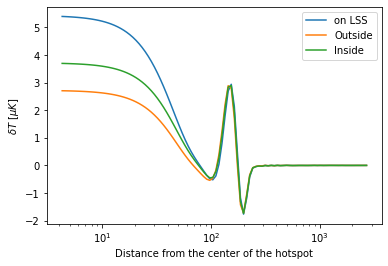

In [6]:
plt.plot(radius_arr, (ISW_angle_arr[24]+SW_angle_arr[24]), label='on LSS')
plt.plot(radius_arr, (ISW_angle_arr[12]+SW_angle_arr[12]), label='Outside')
plt.plot(radius_arr, (ISW_angle_arr[36]+SW_angle_arr[36]), label='Inside')
plt.xscale('log')
plt.xlabel('Distance from the center of the hotspot')
plt.ylabel('$\delta T~[\mu K]$')
plt.legend()

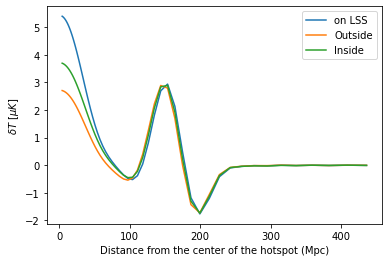

In [7]:
lens = 72
plt.plot(radius_arr[:lens], (ISW_angle_arr[24]+SW_angle_arr[24])[:lens], label='on LSS')
plt.plot(radius_arr[:lens], (ISW_angle_arr[12]+SW_angle_arr[12])[:lens], label='Outside')
plt.plot(radius_arr[:lens], (ISW_angle_arr[36]+SW_angle_arr[36])[:lens], label='Inside')
plt.xlabel('Distance from the center of the hotspot (Mpc)')
plt.ylabel('$\delta T~[\mu K]$')
plt.legend()
plt.savefig("deltaT_vs_radial_eta50.pdf")

In [22]:
nside = 1024
LSS_radius = 13800-280

# A number of pixels
Npixels = 12*nside**2

# pixel size analytic(Rad)
pix_radsq = 4*np.pi/Npixels # Solid angle
pix_rad = np.sqrt(pix_radsq) # Square pixel side length in rad

pix_mpc = angle_to_eta(pix_rad) # (Mpc) 1 pixel size ~ 6.7 Mpc

eta = 100
r_bins = 50 # No need to change
grid_len_r = eta*2/r_bins # Mpc (each grid length)
grid_len_x = pix_mpc # Mpc = grid_len_y



ang_arr = np.logspace(-3.7, -0.7, num=100)
radius_arr = angle_to_eta(ang_arr) # Mpc
pix_arr = (0.2+np.arange(0,25))* grid_len_x # Mpc, Offset is introduced to mimic center pixel

In [23]:
#pix_arr = np.arange(2,100)*3.8
pix_arr

array([  2.70222209,  16.21333253,  29.72444297,  43.23555341,
        56.74666385,  70.25777429,  83.76888473,  97.27999517,
       110.79110562, 124.30221606, 137.8133265 , 151.32443694,
       164.83554738, 178.34665782, 191.85776826, 205.3688787 ,
       218.87998914, 232.39109958, 245.90221002, 259.41332046,
       272.92443091, 286.43554135, 299.94665179, 313.45776223,
       326.96887267])

In [24]:
pix_temp1 = []
pix_temp2 = []

r1_value = 25   # 24 19 7 15, 30 37 18 8
r2_value = 14
deltax = 18
deltay = 11

for rad in range(1,len(pix_arr)):
    #target = pix_arr[rad]
    #target_index = min(enumerate(radius_arr), key=lambda x: abs(target - x[1]))
    #index = target_index[0]
    #pix_temp1.append(SW_angle_arr[r1_value][index]+ISW_angle_arr[r1_value][index])
    #pix_temp2.append(SW_angle_arr[r2_value][index]+ISW_angle_arr[r2_value][index])
    
    SWprofle1 = interpolation(radius_arr, SW_angle_arr[r1_value])
    ISWprofle1 = interpolation(radius_arr, ISW_angle_arr[r1_value])
    
    SWprofle2 = interpolation(radius_arr, SW_angle_arr[r2_value])
    ISWprofle2 = interpolation(radius_arr, ISW_angle_arr[r2_value])
    
    pix_temp1.append(SWprofle1(pix_arr[rad])+ISWprofle1(pix_arr[rad]))
    pix_temp2.append(SWprofle2(pix_arr[rad])+ISWprofle2(pix_arr[rad]))

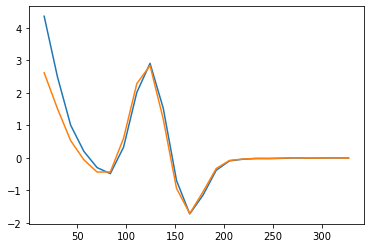

In [25]:
plt.plot(pix_arr[1:], pix_temp1, label='on LSS')
plt.plot(pix_arr[1:], pix_temp2, label='on LSS')

In [26]:
# Create hot spot profile
            
SingleSpot1 = np.zeros((101, 101))
SingleSpot2 = np.zeros((101, 101))


nbin = len(pix_temp1)

# Loop over each bin for a profile function (shape of a hot spot)
for j in range(nbin):
    # A list of positions for each shell of profile
    x_pos = np.empty(0)

    y_pos = np.empty(0)

    # Delta(T) of a given pixel
    result1 = pix_temp1[j]
    result2 = pix_temp2[j]
    #print(str(result))
                
    # Collecting a list of positions for a given shell
    for ii in range (0,101):
        for jj in range (0,101):
            if j <= Get_Dis(51, 51, ii, jj) and Get_Dis(51, 51, ii, jj) < j+1:
                x_pos = np.append(x_pos, ii)
                y_pos = np.append(y_pos, jj)
                
    size_x_pos = len(x_pos)
    
    
    # Injecting a Delta T into the given shell
    for ii in range (0,size_x_pos):
                    
        x_inject = int(x_pos[ii])
        y_inject = int(y_pos[ii])
        
        SingleSpot1[x_inject][y_inject] = SingleSpot1[x_inject][y_inject] + result1
        SingleSpot2[x_inject][y_inject] = SingleSpot2[x_inject][y_inject] + result2

In [27]:
print(SingleSpot1.min())
print(SingleSpot1.max())

-1.7263990454581897
4.3615097775572975


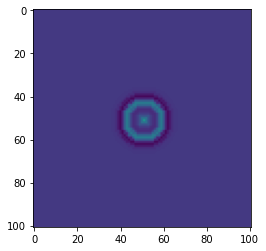

In [28]:
plt.imshow(SingleSpot1,clim=[-2,10])
#plt.savefig("On_LSS_eta50.pdf")

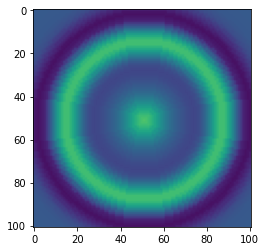

In [21]:
plt.imshow(SingleSpot2,clim=[-2,5])
#plt.savefig("Off_LSS_eta50.pdf")

In [16]:
framedim = 180
frame = np.zeros((framedim, framedim))
# 1st signal boundary

shiftX = int(framedim/2)
shiftY = int(framedim/2)

spot2X = shiftX+deltax
spot2Y = shiftY+deltay

s1Xmin = shiftX-50
s1Xmax = shiftX+51
s1Ymin = shiftY-50
s1Ymax = shiftY+51

            
#2nd signal boundary
s2Xmin = spot2X-50
s2Xmax = spot2X+51
s2Ymin = spot2Y-50
s2Ymax = spot2Y+51

frame[s1Xmin:s1Xmax, s1Ymin:s1Ymax] += SingleSpot1
frame[s2Xmin:s2Xmax, s2Ymin:s2Ymax] += SingleSpot2

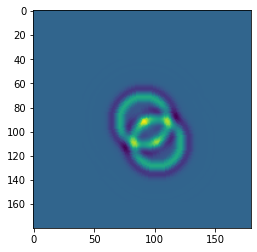

In [17]:
plt.imshow(frame)